In [1]:
import os
import sys

import pandas as pd
import numpy as np

import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs

import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

import yfinance as yf

In [2]:
import pandas as pd
import yfinance as yf
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Define the ticker symbol and the date range
ticker = 'AAPL'
start_date = '2017-01-01'
end_date = '2024-05-27'

# Fetch the historical data
data = yf.download(ticker, start=start_date, end=end_date)

# Extract the adjusted close price
adjusted_close = data['Adj Close']

# Calculate the percentage return
returns = adjusted_close.pct_change().dropna()

# Clean the data: removing any null values
cleaned_data = returns.dropna()

# Save the cleaned data to a CSV file for further analysis
cleaned_data.to_csv('aapl_adjusted_close_returns.csv')


[*********************100%%**********************]  1 of 1 completed


ADF Test on Returns Data
ADF Statistic: -13.616565668823466
p-value: 1.8303089250962994e-25
Critical Values:
   1%: -3.433887758938708
Critical Values:
   5%: -2.8631027223655448
Critical Values:
   10%: -2.567601938172921


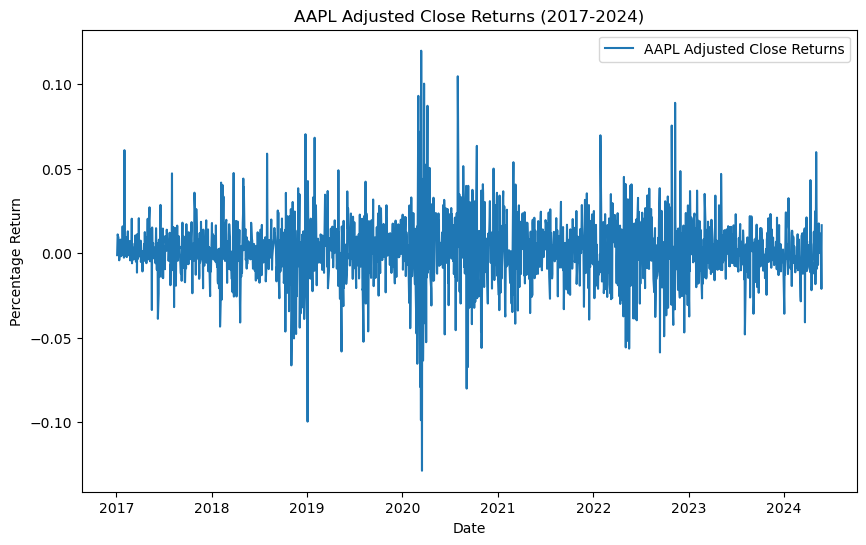

In [3]:
# Function to perform ADF test
def adf_test(series):
    result = adfuller(series)
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    for key, value in result[4].items():
        print('Critical Values:')
        print(f'   {key}: {value}')

# Perform ADF test
print("ADF Test on Returns Data")
adf_test(cleaned_data)

# Plot the returns to visually inspect stationarity
plt.figure(figsize=(10, 6))
plt.plot(cleaned_data, label='AAPL Adjusted Close Returns')
plt.title('AAPL Adjusted Close Returns (2017-2024)')
plt.xlabel('Date')
plt.ylabel('Percentage Return')
plt.legend()
plt.show()


In [20]:
cleaned_data.head()

Date
2017-01-04   -0.001119
2017-01-05    0.005085
2017-01-06    0.011148
2017-01-09    0.009160
2017-01-10    0.001009
Name: Adj Close, dtype: float64

[*********************100%%**********************]  1 of 1 completed
E:\Anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
E:\Anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
E:\Anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ADF Test on Returns Data
ADF Statistic: -13.616565668823466
p-value: 1.8303089250962994e-25
Critical Values:
   1%: -3.433887758938708
Critical Values:
   5%: -2.8631027223655448
Critical Values:
   10%: -2.567601938172921
                               SARIMAX Results                                
Dep. Variable:              Adj Close   No. Observations:                 1860
Model:                 ARIMA(1, 0, 1)   Log Likelihood                4767.017
Date:                Tue, 28 May 2024   AIC                          -9526.034
Time:                        16:20:23   BIC                          -9503.921
Sample:                             0   HQIC                         -9517.885
                               - 1860                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------

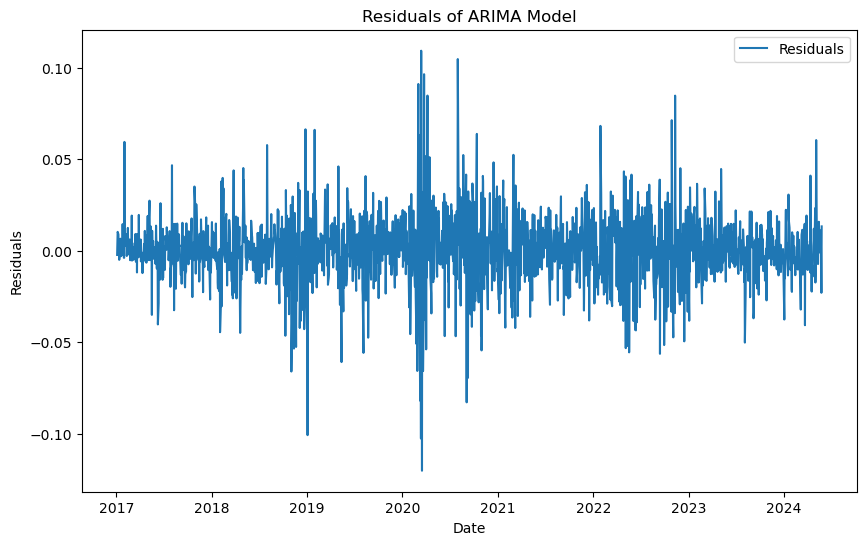

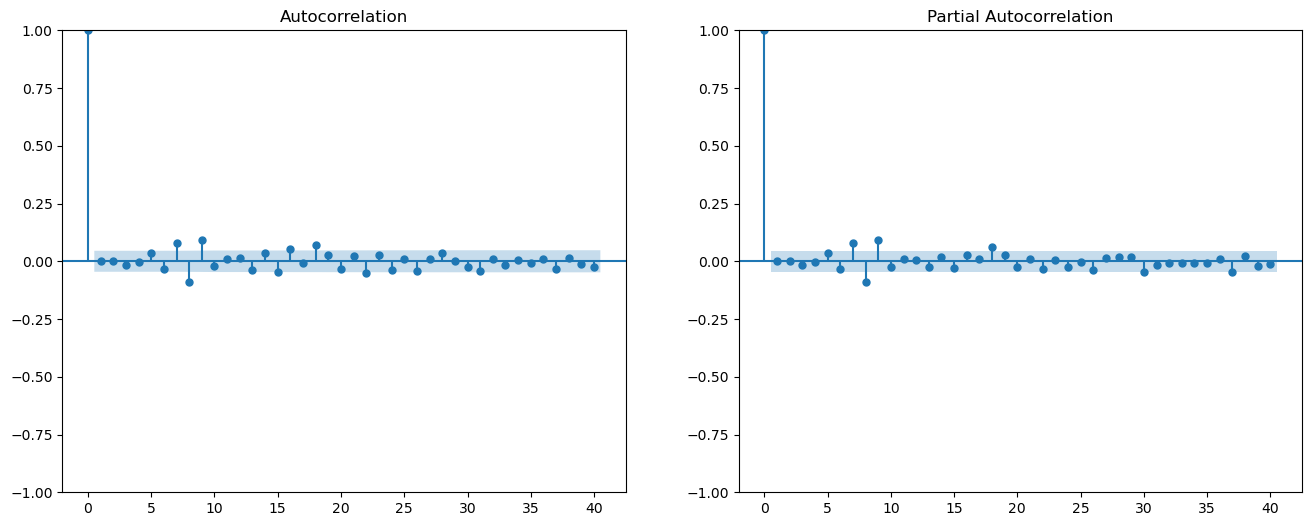

In [4]:
import pandas as pd
import yfinance as yf
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA

# Define the ticker symbol and the date range
ticker = 'AAPL'
start_date = '2017-01-01'
end_date = '2024-05-27'

# Fetch the historical data
data = yf.download(ticker, start=start_date, end=end_date)

# Extract the adjusted close price
adjusted_close = data['Adj Close']

# Calculate the percentage return
returns = adjusted_close.pct_change().dropna()

# Clean the data: removing any null values
cleaned_data = returns.dropna()

# Perform ADF test to check stationarity
def adf_test(series):
    result = adfuller(series)
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    for key, value in result[4].items():
        print(f'Critical Values:')
        print(f'   {key}: {value}')

# ADF test results
print("ADF Test on Returns Data")
adf_test(cleaned_data)

# Fit the ARIMA model
# Here we choose an order, e.g., (p, d, q) = (1, 0, 1), but you should use model selection criteria to find the best fit
model = ARIMA(cleaned_data, order=(1, 0, 1))
fit_model = model.fit()

# Print model summary
print(fit_model.summary())

# Plot the residuals to check for any patterns
residuals = fit_model.resid

plt.figure(figsize=(10, 6))
plt.plot(residuals, label='Residuals')
plt.title('Residuals of ARIMA Model')
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.legend()
plt.show()

# Plot ACF and PACF of residuals
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
sm.graphics.tsa.plot_acf(residuals, lags=40, ax=ax[0])
sm.graphics.tsa.plot_pacf(residuals, lags=40, ax=ax[1])
plt.show()


In [5]:
import pandas as pd
import yfinance as yf
import itertools
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA

In [10]:
# Split data into 80% training and 20% testing sets
split_point = int(len(cleaned_data) * 0.8)
train_data = cleaned_data[:split_point]
test_data = cleaned_data[split_point:]

print(f"Training data length: {len(train_data)}")
print(f"Testing data length: {len(test_data)}")


Training data length: 1488
Testing data length: 372


In [14]:
# Define the p, d, q parameter ranges
p = q = range(0, 15)
d = range(0,1)

# Generate all different combinations of p, d and q triplets
pdq = list(itertools.product(p, d, q))

# Function to fit ARIMA model and calculate AIC
def fit_arima_model(data, order):
    try:
        model = ARIMA(data, order=order)
        result = model.fit()
        return result.aic
    except:
        return float("inf")

# Find the best ARIMA model based on AIC
best_aic = float("inf")
best_order = None
for order in pdq:
    aic = fit_arima_model(train_data, order)
    if aic < best_aic:
        best_aic = aic
        best_order = order

print(f'Best ARIMA order: {best_order} with AIC: {best_aic}')

# Fit the best ARIMA model
best_model = ARIMA(train_data, order=best_order)
fit_model = best_model.fit()

# Print model summary
print(fit_model.summary())


E:\Anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
E:\Anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
E:\Anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
E:\Anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
E:\Anaconda3\Lib\site-packages\stats

Best ARIMA order: (3, 0, 5) with AIC: -7498.206298832301


E:\Anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
E:\Anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
E:\Anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:              Adj Close   No. Observations:                 1488
Model:                 ARIMA(3, 0, 5)   Log Likelihood                3759.103
Date:                Tue, 28 May 2024   AIC                          -7498.206
Time:                        16:56:37   BIC                          -7445.154
Sample:                             0   HQIC                         -7478.435
                               - 1488                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0014      0.001      2.724      0.006       0.000       0.002
ar.L1         -1.0957      0.386     -2.842      0.004      -1.851      -0.340
ar.L2          0.1544      0.665      0.232      0.8

E:\Anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [15]:
import pandas as pd
import yfinance as yf
import itertools
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, r2_score

In [18]:
predictions = fit_model.predict(start=0, end=len(test_data)-1)

# Calculate R-squared and MSE
mse = mean_squared_error(test_data, predictions)
r_squared = r2_score(test_data, predictions)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r_squared}')

Mean Squared Error: 0.00019671519681952924
R-squared: -0.050659201229642514


In [25]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

# ARMA Model (using ARIMA with no differencing)
arma_model = sm.tsa.ARIMA(train['AAPL'], order=(2, 0, 2)).fit()
arma_forecast = arma_model.predict(start=test.index[0], end=test.index[-1])

# ARIMA Model
arima_model = sm.tsa.ARIMA(train['AAPL'], order=(5, 1, 0)).fit()
arima_forecast = arima_model.predict(start=test.index[0], end=test.index[-1], typ='levels')

# Plotting the forecasts
plt.figure(figsize=(14, 8))
plt.plot(train['AAPL'], label='Train')
plt.plot(test['AAPL'], label='Test')
plt.plot(arma_forecast, label='ARMA Forecast')
plt.plot(arima_forecast, label='ARIMA Forecast')
plt.legend()
plt.show()

# Evaluate the models
from sklearn.metrics import mean_squared_error

arma_mse = mean_squared_error(test['AAPL'], arma_forecast)
arima_mse = mean_squared_error(test['AAPL'], arima_forecast)

print(f'ARMA Model MSE: {arma_mse}')
print(f'ARIMA Model MSE: {arima_mse}')

NameError: name 'train' is not defined